# Erstellung des Datensatzes

In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [2]:
class DataPrep:
    def __init__(self, size, name):
        # Format/Auflösung der Trainingsbilder
        self.img_size = size
        # Benennung des erstellten datensatzes
        self.dateiname = name
        # Directories der gelabelten Bilder
        self.side = "/home/dl4/Side" # Für Testvideos --->   "/home/dl4/Labeled_Videos_Test/Side"
        self.front = "/home/dl4/Front" # Für Testvideos --->   /home/dl4/Labeled_Videos_Test/Front
        self.downwards = "/home/dl4/Downwards" # Für Testvideos --->   /home/dl4/Labeled_Videos_Test/Downwards
        self.upwards = "/home/dl4/Upwards" # Für Testvideos --->   /home/dl4/Labeled_Videos_Test/Upwards
        # Konvertieren der Directory-Labels in numerische Werte
        self.labels = {self.side: 0, self.front: 1, self.downwards: 2, self.upwards: 3}
        # Trainingsdaten mit allen transformierten Bildern und deren passendes Label
        self.training_data = []
        # Anzahl der Trainingsdaten pro Label -> Verhältnisse einsehen
        self.side_count = 0
        self.front_count = 0
        self.downwards_count = 0
        self.upwards_count = 0
        
    
    def make_training_data(self):
        #iteration über folder (Side, Front, ...)
        for label in self.labels:
            #iteration über jeden file/image im folder
            for filename in tqdm(os.listdir(label)):
                try:
                    #Konkatenation des folder pfads mit dem image Namen --> Speicherort des Bildes für cv2 operationen
                    path = os.path.join(label, filename)
                    # Transformation der Bilder
                    #print(path)
                    img = cv2.imread(path, cv2.IMREAD_COLOR)
                    img = cv2.resize(img, (self.img_size, self.img_size))
                    #Data augmentation für das Training <-- für Testdaten ausschalten
                        #img_flip = cv2.flip(img, 1)
                    self.training_data.append([np.array(img), self.labels[label]])
                    # Append gespiegeltes Bild <-- für Testdaten ausschalten
                        #self.training_data.append([np.array(img_flip), self.labels[label]])

                    # einfacher Zähler für die labels
                    if label == self.side:
                        self.side_count += 1
                    elif label == self.front:
                        self.front_count += 1
                    elif label == self.downwards:
                        self.downwards_count += 1
                    elif label == self.upwards:
                        self.upwards_count += 1

                #exception für komische nicht-img files   
                except Exception as e:
                    print(e)
                    print(path)
        
        #nachdem das np.array erstellt wurde, soll dieser gemischt werden
        np.random.shuffle(self.training_data)
        
        #np array speichern um damit das modell zu trainieren
        np.save('/home/dl4/testing_datasets/' + self.dateiname, self.training_data)
        
        print("Side:\t", self.side_count)
        print("Front:\t", self.front_count)
        print("Downwards:\t", self.downwards_count)
        print("Upwards:\t", self.upwards_count)

In [3]:
# Erstellung des Datensets anhand übergebener Parameter
data = DataPrep(size = 32, name="training_data_32")
data.make_training_data()

 74%|███████▍  | 3308/4460 [00:12<00:04, 263.82it/s]

OpenCV(4.4.0) /tmp/pip-req-build-99ib2vsi/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/home/dl4/Side/.ipynb_checkpoints


100%|██████████| 401/401 [00:01<00:00, 273.39it/s]
/home/dl4/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Side:	 4459
Front:	 2333
Downwards:	 1107
Upwards:	 401


# Einsehen des erstellten Datensatzes

In [4]:
dir = "/home/dl4/training_datasets/"
training_data = np.load(dir + "training_data_32.npy", allow_pickle=True)

In [5]:
training_data.shape

(8300, 2)

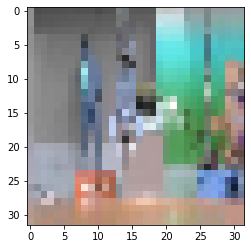

1


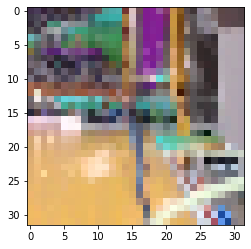

0


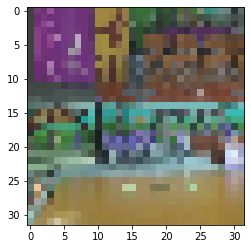

0


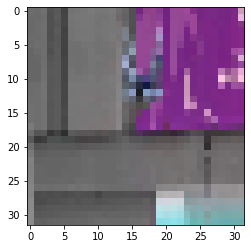

1


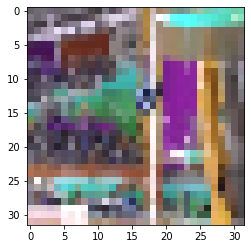

0


In [6]:
# Darstellung gesampleter Bilder
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(training_data[i][0])
    plt.show()
    print(training_data[i][1])